In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier  # <-- Using Random Forest as a standard choice
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv("crop_cleaned.csv")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'crop_cleaned.csv' not found. Please run the data cleaning notebook first.")
    raise

Data loaded successfully.


In [3]:
X = df.drop('Crop', axis=1)
y = df['Crop']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

X_train shape: (40, 10), X_test shape: (10, 10)


In [5]:
print("\nTraining the Random Forest model...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")


Training the Random Forest model...
Model training complete.


In [6]:
joblib.dump(model, "model.pkl")
print("Trained model saved as 'model.pkl'.")

Trained model saved as 'model.pkl'.


In [7]:
y_pred = model.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.4f}")


✅ Model Accuracy: 0.3000


In [9]:
print("\n✅ Classification Report:")


✅ Classification Report:


In [18]:
df_original = pd.read_csv("Crop_data.csv")
crop_le = LabelEncoder()

In [19]:
crop_le.fit(df_original['Crop']) 
target_names = crop_le.classes_

In [20]:
full_labels = crop_le.transform(crop_le.classes_)

In [21]:
print("✅ Classification Report:")
print(classification_report(
    y_test, 
    y_pred, 
    # Use the full set of encoded labels for the report
    labels=full_labels, 
    # Use the full set of corresponding crop names
    target_names=target_names, 
    zero_division=0
))

✅ Classification Report:
              precision    recall  f1-score   support

       Apple       0.00      0.00      0.00         0
      Banana       0.00      0.00      0.00         0
   Blackgram       0.00      0.00      0.00         3
    Chickpea       0.00      0.00      0.00         1
     Coconut       0.00      0.00      0.00         0
      Coffee       0.00      0.00      0.00         0
      Cotton       0.00      0.00      0.00         1
      Grapes       0.00      0.00      0.00         0
        Jute       0.00      0.00      0.00         0
 Kidneybeans       0.00      0.00      0.00         1
      Lentil       0.00      0.00      0.00         1
       Maize       0.50      1.00      0.67         2
       Mango       0.00      0.00      0.00         0
   Mothbeans       1.00      1.00      1.00         1
    Mungbean       0.00      0.00      0.00         0

    accuracy                           0.30        10
   macro avg       0.10      0.13      0.11        10
w

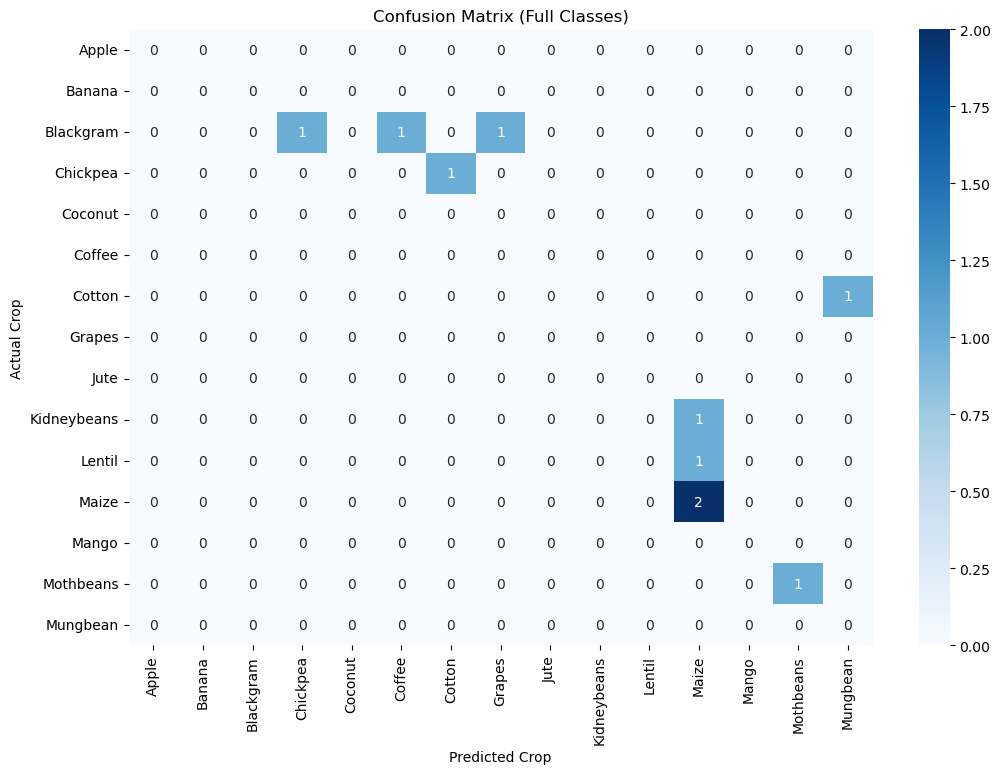

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=full_labels)
plt.figure(figsize=(12, 8))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=target_names, 
    yticklabels=target_names
)
plt.title("Confusion Matrix (Full Classes)")
plt.xlabel("Predicted Crop")
plt.ylabel("Actual Crop")
plt.show()